In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import math
import os
import re

os.chdir('data/msigDB')

In [8]:
# Create dictionary for molecular function (MF), biological process (bp) and cellular component(cc) data
protCPDict = {}
rnaCPDict = {}

# Initialize variables with the most appearance in the code
pValue = 'pValue'
geneSet = 'GeneSet'

# Read data from the files and classify them into MF, BP and CC each
for filename in os.listdir():
    if filename.startswith('p'):
        keyName = re.findall(r'pTop(\S*).txt', filename)[0]
        protCPDict[keyName] = pd.read_table(filename).rename(columns={pValue:keyName})[[geneSet, keyName]]
    elif filename.startswith('r'):
        keyName = re.findall(r'rTop(\S*).txt', filename)[0]
        rnaCPDict[keyName] = pd.read_table(filename).rename(columns={pValue:keyName})[[geneSet, keyName]]

protColNames = list(protCPDict.keys())
rnaColNames = list(rnaCPDict.keys())

In [12]:
# Merge the Top25, Top50, Top100 and TopAll Biological Process data
protCPs = protColNames
protCPDF = protCPDict[protCPs[0]]
for protCP in protCPs[1:]:
    protCPDF = pd.merge(protCPDF, protCPDict[protCP], how='outer', on=geneSet)

# Declare 'NaN' column which consists of the sums of the 'NaN' of each row
protCPDF['# NaN'] = protCPDF.isnull().sum(axis=1)
protCPDF = protCPDF.sort_values(by='# NaN', ascending=True).reset_index(drop=True)[:15]

# Restructure the gene set name
GeneSetNew = [GeneSet.replace('_', ' ').lower().replace('go ', '') for GeneSet in protCPDF['GeneSet']]
protCPDF['GeneSet'] = GeneSetNew

# Calculate the -log10 for each p-value in the cells
for colName in protColNames:
    protCPDF[colName] = [-(math.log(pvals, 10)) for pvals in protCPDF[colName]]

protCPDF[['GeneSet', '25', '50', '100', 'All']]

,GeneSet,25,50,100,All
0,biocarta barr mapk pathway,4.728158,4.119186,5.663540,5.663540
1,kegg alzheimers disease,5.677781,5.931814,12.892790,12.892790
2,kegg alzheimers disease,5.677781,5.931814,12.892790,31.130182
3,reactome neuronal system,6.416801,4.869666,5.554396,9.634512
4,reactome neuronal system,6.416801,4.869666,5.554396,5.554396
5,pid pdgfrb pathway,6.145087,4.910095,6.378824,6.970616
6,pid pdgfrb pathway,6.145087,4.910095,6.378824,6.378824
7,reactome tca cycle and respiratory electron tr...,NaN,6.318759,13.767004,13.767004
8,kegg huntingtons disease,NaN,4.294992,12.460924,29.974694
9,kegg huntingtons disease,NaN,4.294992,12.460924,12.460924


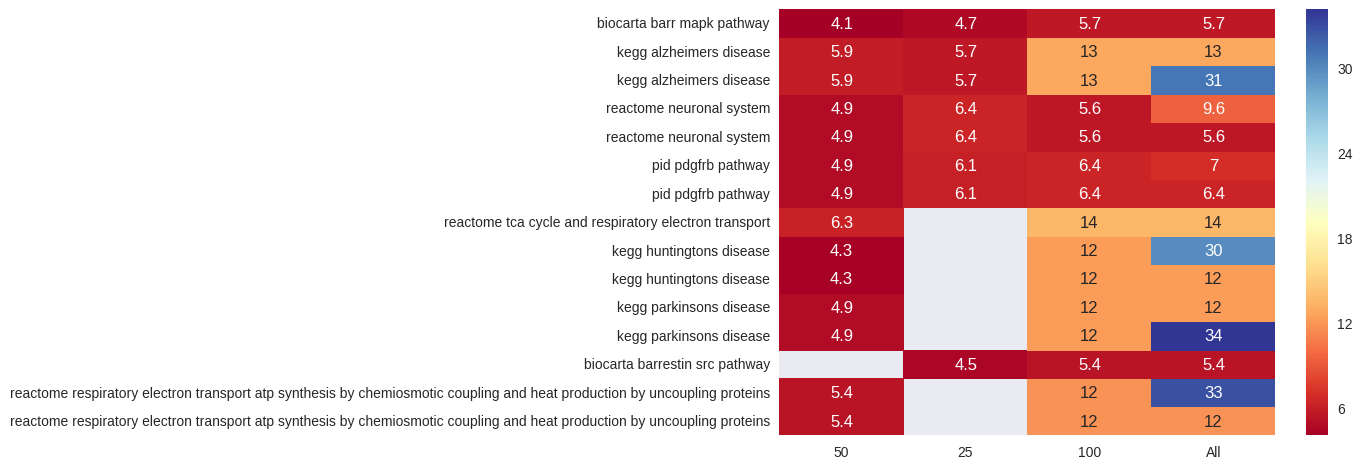

In [27]:
# Generate the heatmap of Protemics Genes Canonical Pathway analysis
sns.heatmap(protCPDF.ix[:, 1:-1], cmap="RdYlBu", annot=True, yticklabels=list(protCPDF['GeneSet']))

In [20]:
# Merge the Top25, Top50, Top100 and TopAll Biological Process data
rnaCPs = rnaColNames
rnaCPDF = rnaCPDict[rnaCPs[0]]
for rnaCP in rnaCPs[1:]:
    rnaCPDF = pd.merge(rnaCPDF, rnaCPDict[rnaCP], how='outer', on=geneSet)

# Declare 'NaN' column which consists of the sums of the 'NaN' of each row
rnaCPDF['# NaN'] = rnaCPDF.isnull().sum(axis=1)
rnaCPDF = rnaCPDF.sort_values(by='# NaN', ascending=True).reset_index(drop=True)[:15]

# Restructure the gene set name
GeneSetNew = [GeneSet.replace('_', ' ').lower().replace('go ', '') for GeneSet in rnaCPDF['GeneSet']]
rnaCPDF['GeneSet'] = GeneSetNew

# Calculate the -log10 for each p-value in the cells
for colName in rnaColNames:
    rnaCPDF[colName] = [-(math.log(pvals, 10)) for pvals in rnaCPDF[colName]]

rnaCPDF = rnaCPDF[['GeneSet', '20', '50', '100', '350', '600', '850', 'All']]

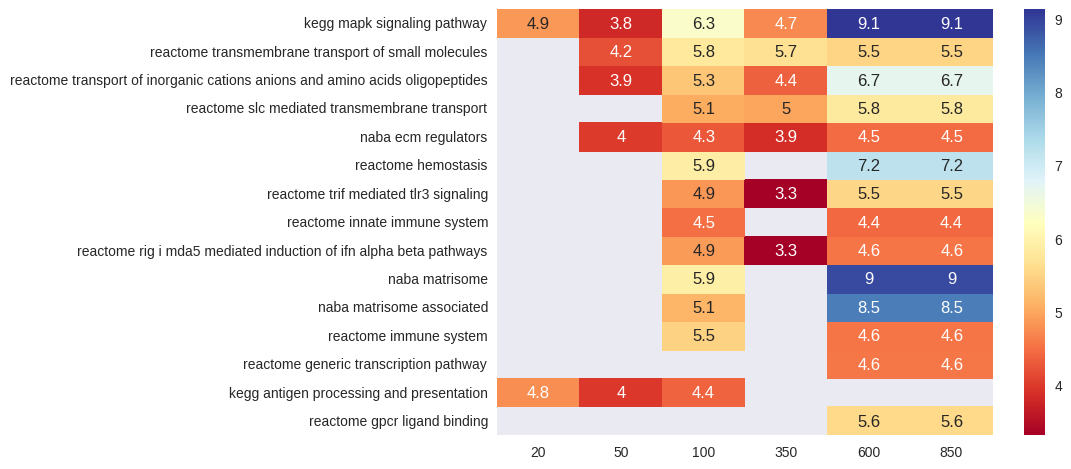

In [26]:
# Generate the heatmap of Protemics Genes Canonical Pathway analysis
sns.heatmap(rnaCPDF.ix[:, 1:-1], cmap="RdYlBu", annot=True, yticklabels=list(rnaCPDF['GeneSet']))